In [29]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from scipy.integrate import simps
import math

In [2]:
m_e =1
h_cut = 1
g = 10

In [3]:
def d_dx(f, x,alpha):
    h = x[1] - x[0]
    f_dash = np.zeros(len(x))
    
    for i in range(len(x)-1):
        f_dash[i] = ( f(alpha,x[i+1]) - f(alpha,x[i]) )/h
    
    return f_dash

In [4]:
def d_2_dx(f, x, alpha):
    h = x[1] - x[0]
    f_double_dash = np.zeros(len(x))
    
    for i in range(1, len(x)-1):
        f_double_dash[i] = ( f(alpha,x[i+1]) - 2*f(alpha,x[i]) + f(alpha,x[i-1])) / h**2
        
    return f_double_dash

In [5]:
def bra_H_ket(f, V, x_grid,alpha):
    T_ket = (-1/2)*d_2_dx(f,x_grid, alpha)
    
    bra_T_ket = simps(np.conj(f(alpha,x_grid)) * T_ket, x_grid)
    bra_V_ket = simps(np.conj(f(alpha,x_grid))*V*f(alpha,x_grid), x_grid)
    
    bra_H_ket = bra_T_ket + bra_V_ket
    
    return bra_H_ket

In [6]:
def bra_ket_overlap(f, x_grid,alpha):
    bra_ket_integrate = simps(np.conj(f(alpha,x_grid))*f(alpha,x_grid) , x_grid)
    
    return bra_ket_integrate

In [7]:
def expected_energy(f, V, x_grid,alpha):
    bra_h_ket = bra_H_ket(f, V, x_grid, alpha)
    bra_ket_integrate = bra_ket_overlap(f, x_grid,alpha)
    
    bra_E_ket = bra_h_ket / bra_ket_integrate
    
    return bra_E_ket

                        # Gradient Descent
    alpha = parameter
    step_grad = const
    grad = dE/dalpha
    updated_alpha = alpha - (step_grad * grad)
    

                             # Gradient
 The expression of gradient would change, according to the energy expectation expression

         # Implementing the gradient descent opt with the help of initial values

In [37]:
# Initiate empty list : used for recording data during the iteration
alpha_update_list = []
E_list = []
iteration_list= []

# define the initial constants and function
x_grid = np.arange(0,20,0.01)
V = m_e*g*x_grid
psi_trial = lambda alpha,x: x*np.exp(-alpha*x)
tolerance = 1.0e-6
converged = False

# Intitial Values that will be used to start and implement the gradient descent 
alpha = 1  
E0 = expected_energy(psi_trial, V, x_grid, alpha)
h = 0.01
alpha0 = alpha
alpha = alpha0 + h
num_iterations = 2000
step = 0.001
iteration = 0

while not converged and iteration < num_iterations:
    E1 = expected_energy(psi_trial, V, x_grid,alpha)
    dE_dalpha = (E1 - E0)/ (alpha - alpha0)
    
    # update the parameter with SGD 
    updated_alpha = alpha - step*dE_dalpha
    
    # Record the data
    alpha_update_list.append(updated_alpha)
    E_list.append(E1)
    iteration_list.append(iteration)
    
    # arrange the parameters for next iteration
    alpha0 = alpha
    alpha = updated_alpha
    E0  = E1
    
    # Print at intervals of (num_iterations/10, here it is: 2000/10 = 200)
    # therefore we print at every successive 200th iteration interval 
    if iteration% math.ceil(num_iterations / 10) == 0:
        print(f"Iteration {iteration:4d}: Expected_Energy {E_list[-1]} and alpha: {alpha_update_list[-1]}   ")
    
    # Convergence criteria and iteration update
    converged = abs(alpha-alpha0) < tolerance
    iteration += 1

Iteration    0: Expected_Energy 15.361542169452832 and alpha: 1.0238464490170212   
Iteration  200: Expected_Energy 9.600261933030724 and alpha: 1.9487363424389381   
Iteration  400: Expected_Energy 9.227682978852517 and alpha: 2.2130973636980107   
Iteration  600: Expected_Energy 9.150819779480283 and alpha: 2.3343532788158683   
Iteration  800: Expected_Energy 9.1312600108783 and alpha: 2.3957165264703137   
Iteration 1000: Expected_Energy 9.125852227859239 and alpha: 2.428026321212843   
Iteration 1200: Expected_Energy 9.124297540154485 and alpha: 2.4453618512290904   
Iteration 1400: Expected_Energy 9.123841630215447 and alpha: 2.454752699910771   
Iteration 1600: Expected_Energy 9.123706533019238 and alpha: 2.459865606148987   
Iteration 1800: Expected_Energy 9.123666275905968 and alpha: 2.4626569199328388   


In [25]:
alpha

2.464171883367353

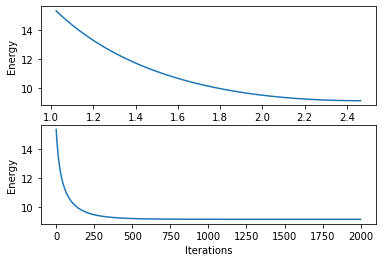

In [26]:
plt.subplot(2,1,1)
plt.plot(alpha_update_list, E_list)
plt.xlabel("updated_alphas")
plt.ylabel("Energy")
plt.subplot(2,1,2)
iterations = np.arange(1,num_iterations+1, 1)
plt.xlabel("Iterations")
plt.ylabel("Energy")
plt.plot(iteration_list, E_list)